# Ejemplo 2: Regresión polinomial

## Descripción
En este ejemplo, utilizaremos el conjunto de datos de un conjunto de puntos en una curva sinusoidal para demostrar la regresión polinomial. Una curva sinusoidal, también conocida como función sinusoidal o simplemente sinusoidal, es un tipo de curva matemática que representa el comportamiento de una función seno o coseno en un gráfico. Estas curvas son caracterizadas por tener una forma de "onda" que se repite periódicamente a lo largo del eje horizontal.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [110]:
# Crear datos de ejemplo: una curva sinusoidal con ruido
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.5 * np.random.randn(80)

In [111]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Crear un DataFrame para visualización
data = pd.DataFrame({'X': X_train.flatten(), 'y': y_train})
data

,X,y
0,4.718740,-0.661763
1,3.696318,0.136483
2,3.281648,-0.217103
3,2.609242,-0.127682
4,0.551876,0.588777
...,...,...
59,1.051913,1.101205
60,3.575947,-0.271706
61,4.458865,-0.952119
62,0.690915,0.201844


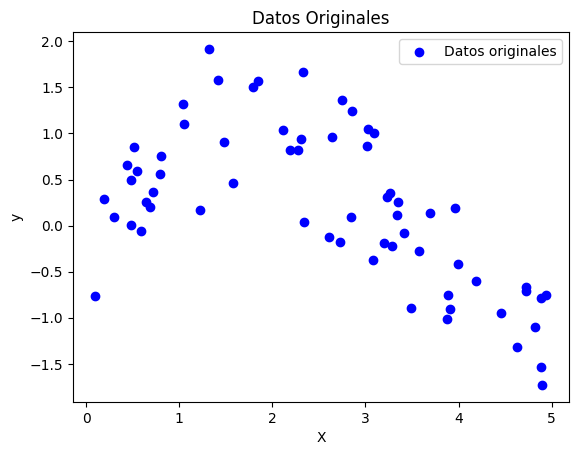

In [113]:
# Visualizar los datos originales
plt.scatter(X_train, y_train, label='Datos originales', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos Originales')
plt.legend()
plt.show()

`PolynomialFeatures` es una transformación que se utiliza en el procesamiento de características (feature engineering) en el aprendizaje automático. Esta transformación toma características originales y genera nuevas características que son combinaciones polinómicas de las características originales.

El parámetro `degree` de PolynomialFeatures controla el grado máximo de las combinaciones polinómicas a generar. En otras palabras, determina el número de términos en las combinaciones polinómicas. Por ejemplo, si degree es 2, se generarán todas las combinaciones de características de grado 2 o menos. Si degree es 3, se generarán todas las combinaciones de características de grado 3 o menos.

Por ejemplo, si tienes una característica "x", y estableces degree en 2, PolynomialFeatures generará las siguientes características adicionales:

x^2: El cuadrado de la característica original.
x: La característica original.
1: Una característica constante (intercept) igual a 1.

Estas nuevas características pueden ser útiles cuando se sospecha que la relación entre las características y la variable objetivo no es lineal y puede beneficiarse de una representación polinómica. Sin embargo, es importante tener en cuenta que aumentar el grado (degree) puede llevar a un aumento en la complejidad del modelo y al riesgo de sobreajuste, por lo que se debe elegir con cuidado.

In [114]:
# Crear un modelo de regresión polinomial de grado 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()

In [115]:
# Entrenar el modelo polinomial
poly_model.fit(X_poly, y_train)

LinearRegression()

In [116]:
# Realizar predicciones en el conjunto de prueba
X_test_poly = poly_features.transform(X_test)
y_pred = poly_model.predict(X_test_poly)

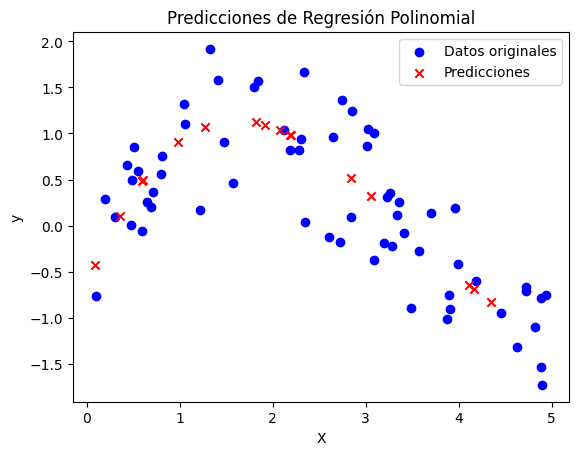

MSE en conjunto de prueba: 0.20845599329194414
MSE con validación cruzada: 0.2452286755799014


In [117]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(poly_model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()  # Negate the scores to get positive MSE values

# Visualizar las predicciones
plt.scatter(X_train, y_train, label='Datos originales', color='blue')
plt.scatter(X_test, y_pred, label='Predicciones', color='red', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("MSE con validación cruzada:", mse_cv)